In [12]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.19

  Using cached https://files.pythonhosted.org/packages/a4/b3/209652a5d60ce4a2a8a35ad893d7565bbb0f87ce043264ba5c9e7de304cd/scikit_learn-0.19.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: category-encoders 2.0.0 has requirement scikit-learn>=0.20.0, but you'll have scikit-learn 0.19.0 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.19.0 which is incompatible.


In [13]:
# !pip install chart_studio
# !pip install windrose
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# from windrose import WindroseAxes
import os
%matplotlib inline

In [14]:
# data = pd.read_csv("T1.csv")

In [15]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fb2ecfbf09d64f5893a02b6c5246459e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4ZGsGNcUA1xI_LfHDY8s9-TRkLXXo3irnLyigtga6llK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fb2ecfbf09d64f5893a02b6c5246459e.get_object(Bucket='windenergypredictortest-donotdelete-pr-2rw1w4x9ai0weh',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [16]:
##Energy Prediction

In [17]:
import datetime
import time

In [18]:
# data=pd.read_csv('./T1.csv')
# data.head()

In [19]:
data.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


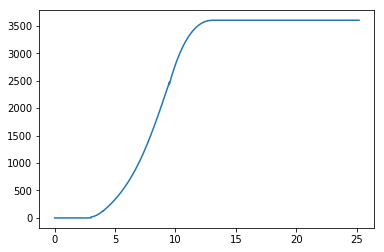

In [20]:
x=data.sort_values(by='WindSpeed')['WindSpeed']
y=data.sort_values(by='WindSpeed')['Power']

plt.plot(x,y)

In [21]:
x_train=data[['WindSpeed','WindDirection']].values
y_train=data['ActivePower'].values

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
xgb.__version__

'0.80'

In [23]:
model_xgb1 = xgb.XGBRegressor(learning_rate=2e-2, max_depth=4, 
                             min_child_weight=1.1, n_estimators=300,
                             reg_alpha=0.3, reg_lambda=0.7,
                             #subsample=0.5213, silent=1,
                             nthread = -1)

In [24]:
model_xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=4, min_child_weight=1.1, missing=None, n_estimators=300,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0.3, reg_lambda=0.7, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
preds=model_xgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

369.10087749260117

In [26]:
r2_score(y_train,preds)

0.9209089940499848

In [27]:
model_xgb1.predict(np.array([5.67,268.4]).reshape(1,-1))

array([426.50067], dtype=float32)

In [28]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-07-20 15:04:31,100 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [30]:
wml_credentials = {
  "apikey": "g-5r8T9LLSzpixVczkuo2NDWCCNVWZpEEJMcgv6dGVbX",
  "iam_apikey_description": "Auto-generated for key 8ff2cdb1-bd3a-4440-804e-9559c9823c7c",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/2a0df662daba4c64988094a9ae9cf563::serviceid:ServiceId-5f420f12-873e-4365-85c6-3a2d1a8eb168",
  "instance_id": "54cebaa7-c311-4633-9218-d1ac172b925c",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}


In [31]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [33]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "Aman Jashmin Gurudeep",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "cse.170310312@silicon.ac.in",
    client.repository.ModelMetaNames.NAME : "Wind Energy Prediction"
    
}

In [34]:
model_artifact = client.repository.store_model(model_xgb1, meta_props = model_props)

In [35]:
model_artifact

{'metadata': {'guid': '9aa0b0c4-d408-4dea-a072-6a3e4091ff5f',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/published_models/9aa0b0c4-d408-4dea-a072-6a3e4091ff5f',
  'created_at': '2020-07-20T15:04:31.360Z',
  'modified_at': '2020-07-20T15:04:31.409Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/published_models/9aa0b0c4-d408-4dea-a072-6a3e4091ff5f/learning_configuration',
  'author': {'name': 'Aman Jashmin Gurudeep'},
  'name': 'Wind Energy Prediction',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/published_models/9aa0b0c4-d408-4dea-a072-6a3e4091ff5f/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/published_models/9aa0b0c4-d408-4dea-a072-6a3e4091ff5f/feedback',
  'lates

In [36]:
guid = client.repository.get_model_uid(model_artifact)

In [37]:
guid

'9aa0b0c4-d408-4dea-a072-6a3e4091ff5f'

In [38]:
deploy = client.deployments.create(guid, name = "WindEnergyDeploy")



#######################################################################################

Synchronous deployment creation for uid: '9aa0b0c4-d408-4dea-a072-6a3e4091ff5f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7af8ee21-4f12-4d76-873a-f5dcb625b64f'
------------------------------------------------------------------------------------------------




In [39]:
client.deployments.list()

------------------------------------  ----------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME              TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
7af8ee21-4f12-4d76-873a-f5dcb625b64f  WindEnergyDeploy  online  DEPLOY_SUCCESS  2020-07-20T15:04:46.690Z  scikit-learn-0.19  model
------------------------------------  ----------------  ------  --------------  ------------------------  -----------------  -------------


In [ ]:
client.deployments.delete('44e6d787-3718-4bb3-a78b-df4558b055c1')

In [40]:
deploy

{'metadata': {'guid': '7af8ee21-4f12-4d76-873a-f5dcb625b64f',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/deployments/7af8ee21-4f12-4d76-873a-f5dcb625b64f',
  'created_at': '2020-07-20T15:04:46.690Z',
  'modified_at': '2020-07-20T15:04:47.488Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'WindEnergyDeploy',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/deployments/7af8ee21-4f12-4d76-873a-f5dcb625b64f/online',
  'deployable_asset': {'name': 'Wind Energy Prediction',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/published_models/9aa0b0c4-d408-4dea-a072-6a3e4091ff5f',
   'guid': '9aa0b0c4-d408-4dea-a072-6a3e4091ff5f',
   'created_at': '2020-07-20T15:04:46.660Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.19',
  '

In [41]:
scoring_url = client.deployments.get_scoring_url(deploy)
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/deployments/7af8ee21-4f12-4d76-873a-f5dcb625b64f/online'

In [42]:
client.deployments.get_scoring_url(deploy)

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/54cebaa7-c311-4633-9218-d1ac172b925c/deployments/7af8ee21-4f12-4d76-873a-f5dcb625b64f/online'